<a href="https://colab.research.google.com/github/Amulya-Rao-mj/Machine-learning-lab-/blob/main/LinearRegression_social_media_vs_productivity_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root Mean Squared Error (RMSE): 0.7349639365907454

Random Sample Predictions:
Actual: 3.65, Predicted: 4.03
Actual: 6.49, Predicted: 6.20
Actual: 6.95, Predicted: 6.48
Actual: 5.06, Predicted: 4.37
Actual: 5.69, Predicted: 5.66


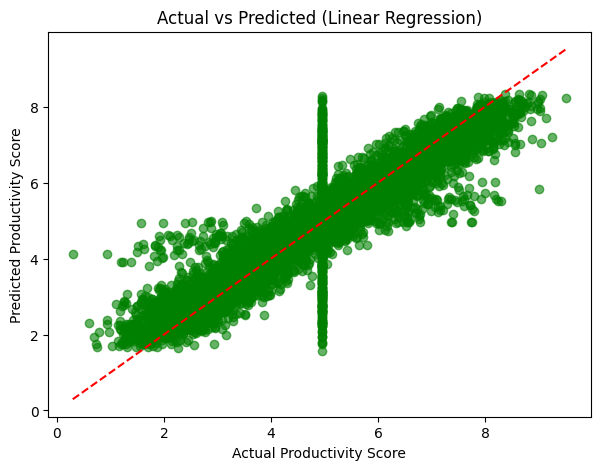

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import random
import matplotlib.pyplot as plt

data = pd.read_csv("social_media_vs_productivity.csv")

for col in data.select_dtypes(include=["object"]).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

for col in data.select_dtypes(include=["number"]).columns:
    data[col] = data[col].fillna(data[col].mean())

label_encoders = {}
for col in ["gender", "job_type", "social_platform_preference", "uses_focus_apps", "has_digital_wellbeing_enabled"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop(["actual_productivity_score"], axis=1)
y = data["actual_productivity_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nRandom Sample Predictions:")
sample_indices = random.sample(range(len(X_test)), 5)
for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_pred[idx]
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()
